In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
dataset=pd.read_csv("/content/Fitbit_feature_merged_version_2023.06.20_ST-II&ST-V_Pre.csv")
#dataset=pd.read_csv("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Fitbit_feature_merged_version_2023.06.20_ST-II&ST-V_Pre.csv")


In [9]:
dataset.head(10)

,Subject,Condition,Activity,Epoch Duration(min),Epoch,ST-II Max. Increase,ST-II Max. decrease,ST-II Max-Min Difference,ST-V Max. Increase,ST-V Max. decrease,...,1_min_HR_Recovery(mean),1_min_HR_Recovery(stdev),2_min_HR_Recovery(mean),2_min_HR_Recovery(stdev),3_min_HR_Recovery(mean),3_min_HR_Recovery(stdev),4_min_HR_Recovery(mean),4_min_HR_Recovery(stdev),5_min_HR_Recovery(mean),5_min_HR_Recovery(stdev)
0,002-JR,pre,Light,10,1,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
1,002-JR,pre,Light,10,10,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
2,002-JR,pre,Light,10,11,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
3,002-JR,pre,Light,10,12,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
4,002-JR,pre,Light,10,13,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
5,002-JR,pre,Light,10,14,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
6,002-JR,pre,Light,10,15,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
7,002-JR,pre,Light,10,16,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
8,002-JR,pre,Light,10,17,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
9,002-JR,pre,Light,10,18,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432


In [10]:
dataset.dropna(axis=0, how='any', inplace = True)
dataset = dataset.reset_index(drop=True)


In [11]:
dataset.shape

(2629, 123)

In [12]:
X = dataset.iloc[:,11:]
y = dataset.iloc[:, 7]

In [13]:
X.head(10)

,nni_counter,nni_mean,nni_min,nni_max,hr_mean,hr_min,hr_max,hr_std,nni_diff_mean,nni_diff_min,...,1_min_HR_Recovery(mean),1_min_HR_Recovery(stdev),2_min_HR_Recovery(mean),2_min_HR_Recovery(stdev),3_min_HR_Recovery(mean),3_min_HR_Recovery(stdev),4_min_HR_Recovery(mean),4_min_HR_Recovery(stdev),5_min_HR_Recovery(mean),5_min_HR_Recovery(stdev)
0,65,779.015385,740,810,77.047607,74.074074,81.081081,1.459607,6.078125,0,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
1,65,703.938462,666,740,85.275756,81.081081,90.090090,1.890121,7.453125,0,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
2,66,774.393939,731,833,77.537793,72.028812,82.079343,2.133033,9.107692,0,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
3,77,762.038961,697,821,78.878037,73.081608,86.083214,3.387898,10.381579,0,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
4,72,688.861111,652,731,87.146588,82.079343,92.024540,2.014072,7.098592,0,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
5,72,735.500000,697,800,81.660141,75.000000,86.083214,2.589556,7.929577,0,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
6,66,743.106061,681,789,80.820900,76.045627,88.105727,2.573095,6.615385,0,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
7,72,642.000000,612,674,93.517353,89.020772,98.039216,2.372689,5.971831,0,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
8,72,655.638889,582,697,91.598758,86.083214,103.092783,2.891687,6.211268,0,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
9,75,681.346667,618,714,88.188794,84.033613,97.087379,3.439274,7.148649,0,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432


In [14]:
y.head(10)

0    0.5
1    0.5
2    0.5
3    0.5
4    0.5
5    0.5
6    0.5
7    0.5
8    0.5
9    0.5
Name: ST-II Max-Min Difference, dtype: float64

In [15]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

In [16]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [22 43 44 45 67 68 74 76 90 91 92] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [17]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [18]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [19]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 50


In [20]:
imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

                        Specs       Score
101           aEE_MAX(kJ/min)  460.184073
102   1_min_HR_Recovery(mean)  390.128672
104   2_min_HR_Recovery(mean)  390.128672
106   3_min_HR_Recovery(mean)  390.128672
108   4_min_HR_Recovery(mean)  390.128672
110   5_min_HR_Recovery(mean)  390.128672
100               HR_MAX(BPM)  244.964803
103  1_min_HR_Recovery(stdev)  181.685686
105  2_min_HR_Recovery(stdev)  181.685686
107  3_min_HR_Recovery(stdev)  181.685686
109  4_min_HR_Recovery(stdev)  181.685686
111  5_min_HR_Recovery(stdev)  181.685686
19                     tinn_m   61.342674
1                    nni_mean   59.403458
18                     tinn_n   52.273329
2                     nni_min   51.151625
4                     hr_mean   48.327458
3                     nni_max   47.908734
83                 ar_log_low   47.354449
77                 ar_abs_low   47.091222
89                   ar_total   44.228992
85                ar_log_high   44.179026
5                      hr_min   43

In [21]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

In [22]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 7]

In [23]:
!pip install shap
import shap

def explain_shap(model,temp_X,max_dis=20):
  explainer = shap.Explainer(model.predict, temp_X)
  shap_values = explainer (temp_X)
  shap.plots.bar(shap_values,max_display=max_dis)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.6 MB/s eta 0:00:00


<font color = "red" size='5'>No spliting </font>

In [24]:
X_train=X_new.iloc[:148,:]
X_test=X_new.iloc[148:,:]
y_train=y_new.iloc[:148]
y_test=y_new.iloc[148:]

#Linear Regression <font color = "red" size='5'> (previous Version)</font>

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)


###Taining Ploting and Result

In [26]:
y_pred_train = lin_reg.predict(X_train)

print(y_pred.shape)
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y_train,y_pred_train)
print("Training r2: ",r2)


r_sq = lin_reg.score(X_new, y_new)
r_sq_sqrt = r_sq**.5
print("Training r_sq_sqrt: ",r_sq_sqrt)





(2481,)
Training r2:  1.0
Training r_sq_sqrt:  nan


invalid value encountered in double_scalars


In [27]:
r_sq_train = lin_reg.score(X_train, y_pred_train)
print(r_sq_train)

1.0


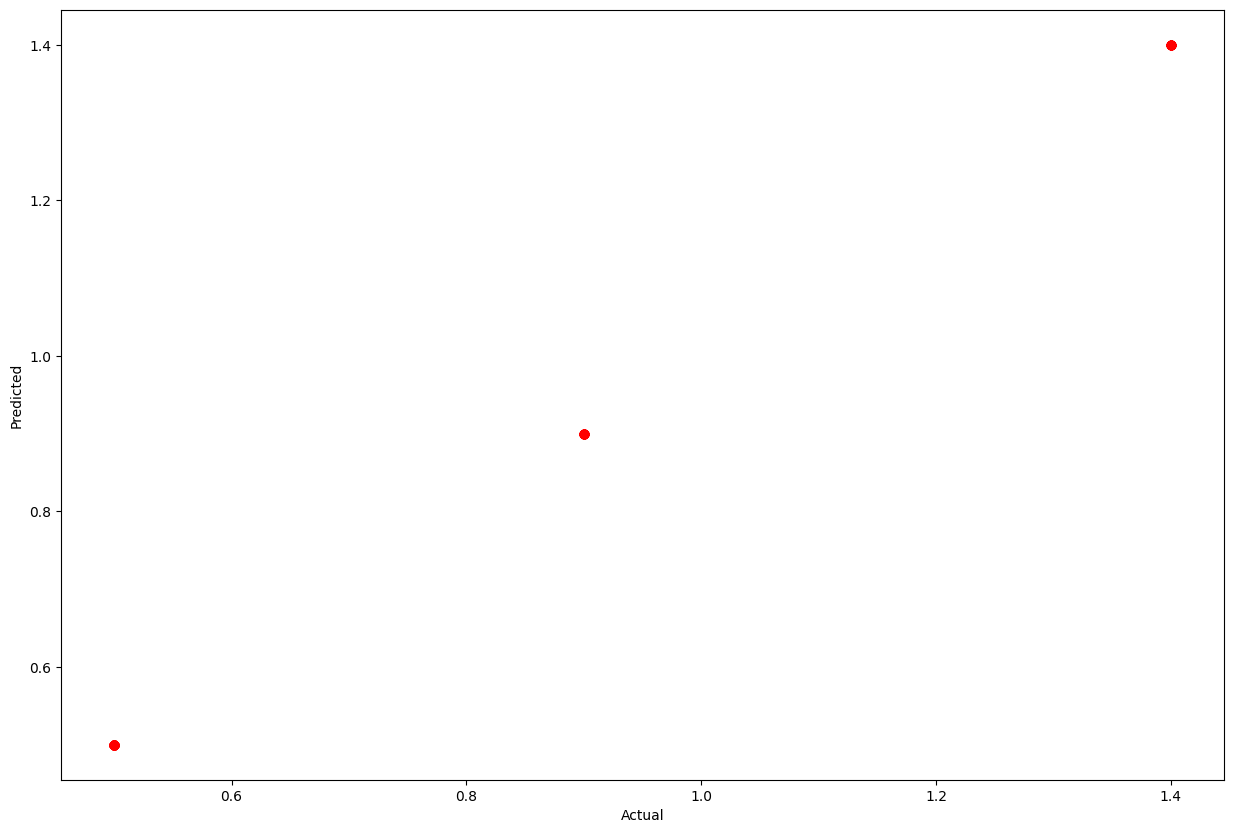

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred_train, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [29]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_train,
        "Predicted Value":y_pred_train,
        "Difference":y_train-y_pred_train
    }
)

pred_y_df

,Actual Value,Predicted Value,Difference
0,0.5,0.5,-3.108624e-15
1,0.5,0.5,-2.220446e-15
2,0.5,0.5,-1.776357e-15
3,0.5,0.5,-3.552714e-15
4,0.5,0.5,-8.881784e-16
...,...,...,...
143,0.9,0.9,1.443290e-15
144,0.9,0.9,-9.992007e-16
145,0.9,0.9,-1.110223e-16
146,0.9,0.9,3.330669e-16


In [30]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred_train))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred_train))



Mean squared error: 0.00
Coefficient of determination: 1.00


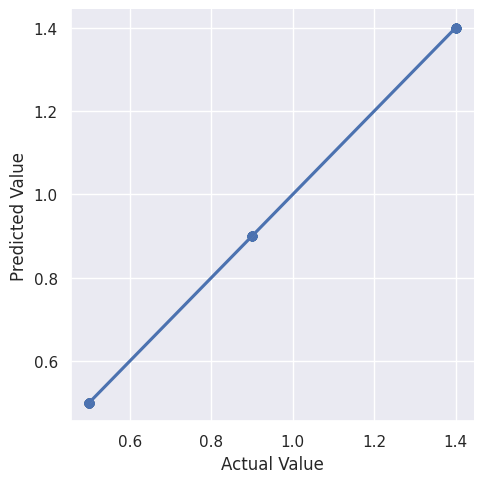

In [31]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df,
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)



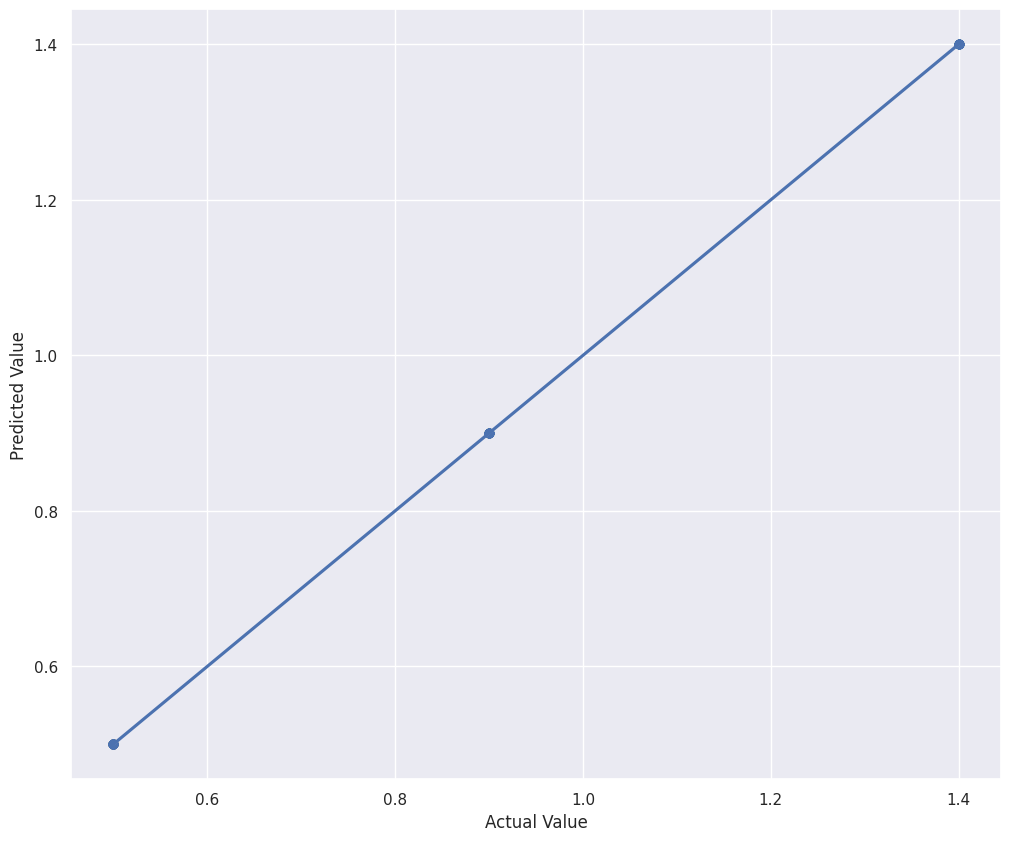

In [32]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);




###Testing Ploting and Result

In [33]:
y_pred_test = lin_reg.predict(X_test)


from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_test,y_pred_test))

r_sq = lin_reg.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  -0.12240528289943509
R_sq:  -0.08042606616737902


In [34]:
r_sq_test = lin_reg.score(X_test, y_pred_test)
print(r_sq_test)

1.0


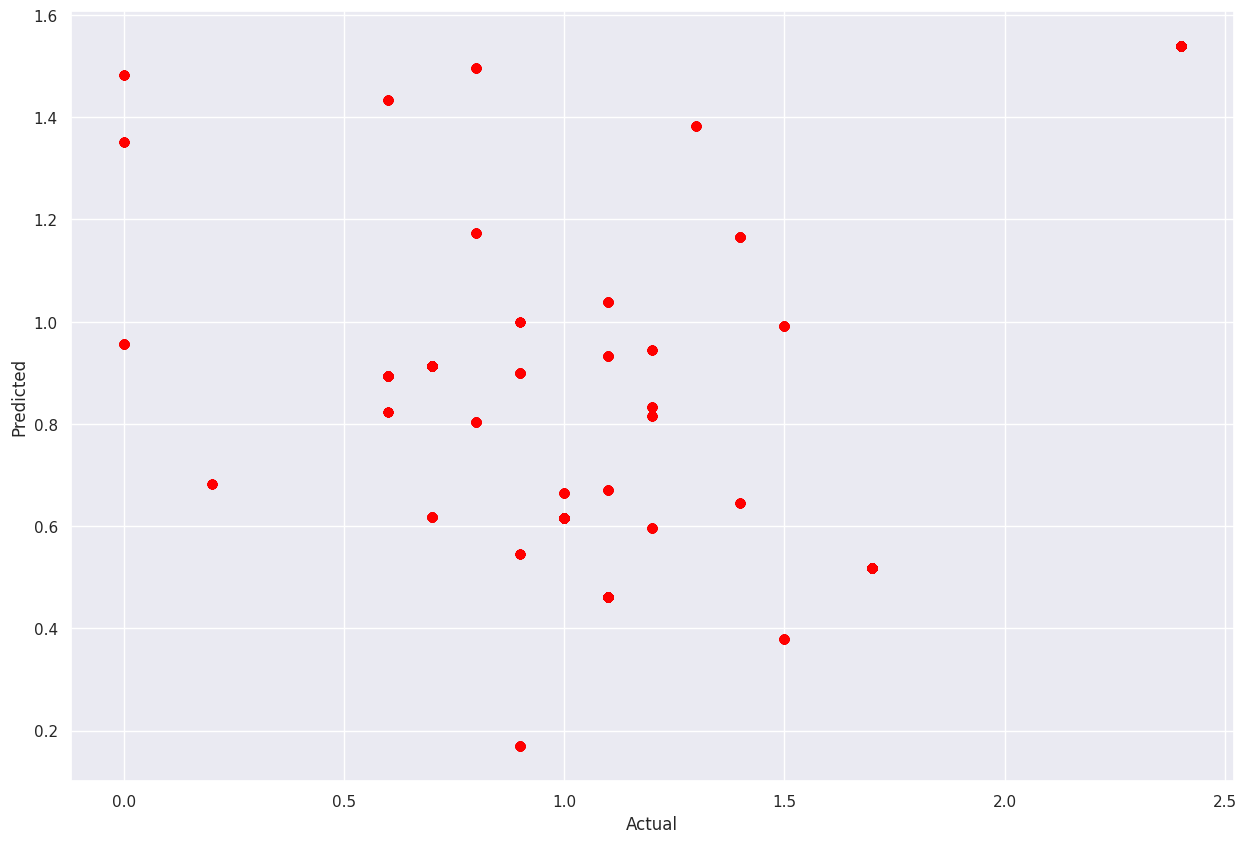

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred_test, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [36]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_test,
        "Predicted Value":y_pred_test,
        "Difference":y_test-y_pred_test
    }
)

pred_y_df


,Actual Value,Predicted Value,Difference
148,0.9,0.900000,2.109424e-15
149,0.9,0.900000,5.551115e-16
150,0.9,0.900000,2.997602e-15
151,0.9,0.900000,-9.992007e-16
152,0.9,0.900000,5.551115e-16
...,...,...,...
2624,1.1,1.037947,6.205273e-02
2625,1.1,1.037947,6.205273e-02
2626,1.1,1.037947,6.205273e-02
2627,1.1,1.037947,6.205273e-02


In [37]:

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_test))


Mean squared error: 0.38
Coefficient of determination: -0.12


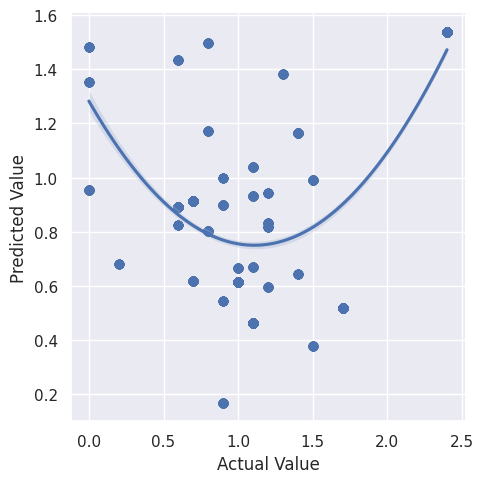

In [38]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df,
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)

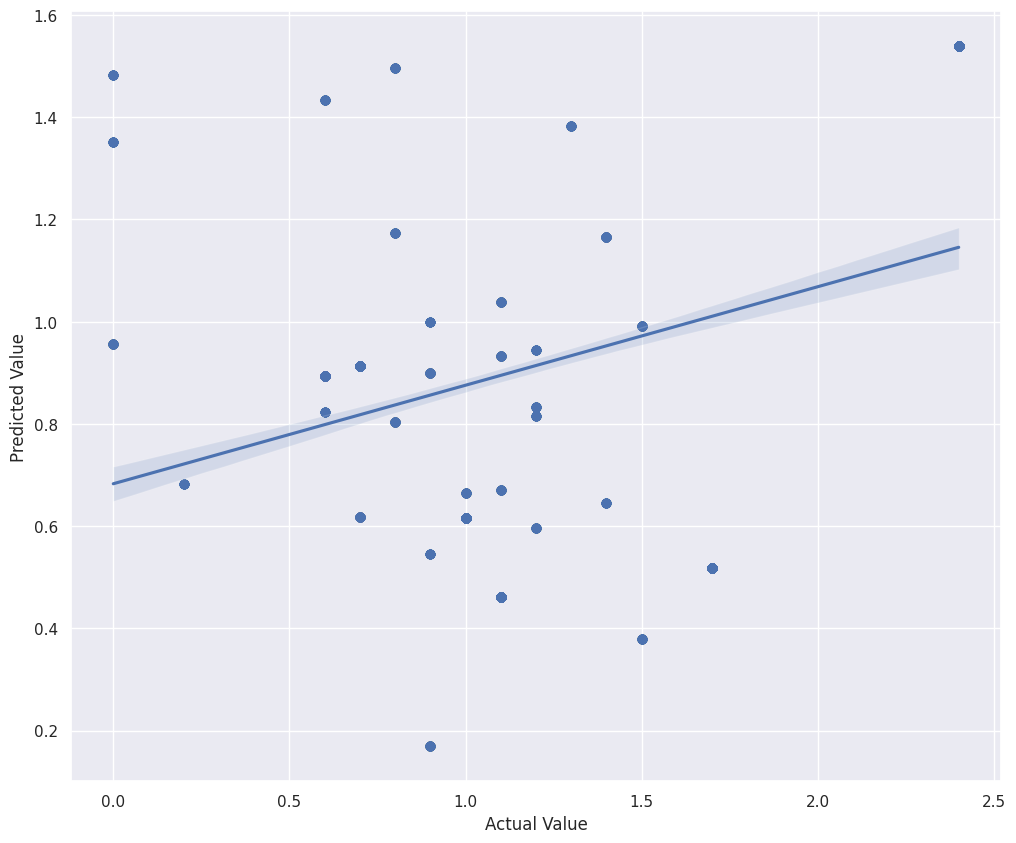

In [39]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);

###Over All dataset Ploting and Results

In [40]:
y_pred_new = lin_reg.predict(X_new)


from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_new,y_pred_new))

r_sq = lin_reg.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  -0.08042606616737902
R_sq:  -0.08042606616737902


In [41]:
r_sq_test = lin_reg.score(X_new, y_pred_new)
print(r_sq_test)

1.0


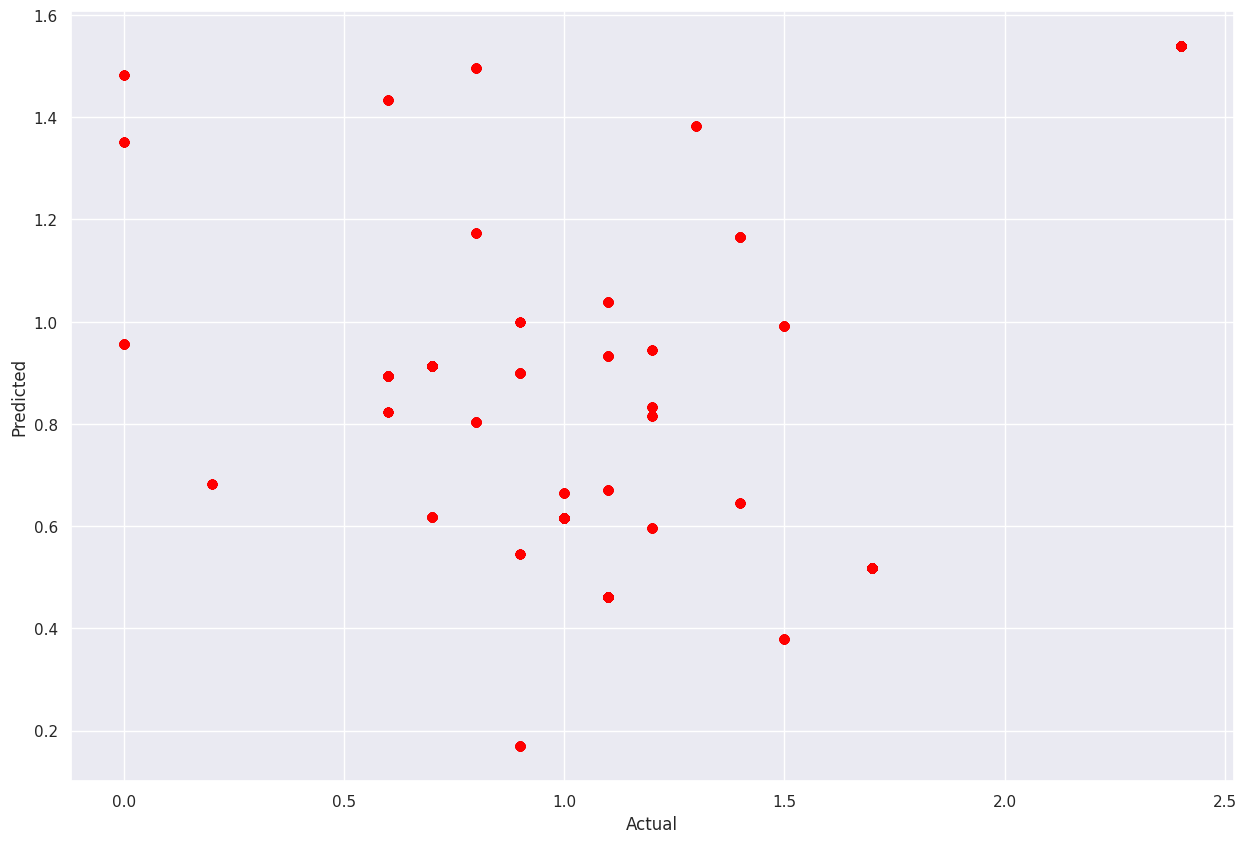

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred_test, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [43]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_new,
        "Predicted Value":y_pred_new,
        "Difference":y_new-y_pred_new
    }
)

pred_y_df


,Actual Value,Predicted Value,Difference
0,0.5,0.500000,-3.108624e-15
1,0.5,0.500000,-2.220446e-15
2,0.5,0.500000,-1.776357e-15
3,0.5,0.500000,-3.552714e-15
4,0.5,0.500000,-8.881784e-16
...,...,...,...
2624,1.1,1.037947,6.205273e-02
2625,1.1,1.037947,6.205273e-02
2626,1.1,1.037947,6.205273e-02
2627,1.1,1.037947,6.205273e-02


In [44]:

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_new, y_pred_new))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_new, y_pred_new))


Mean squared error: 0.36
Coefficient of determination: -0.08


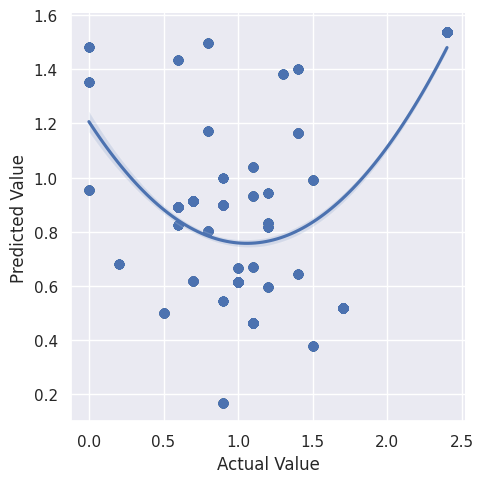

In [45]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df,
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)

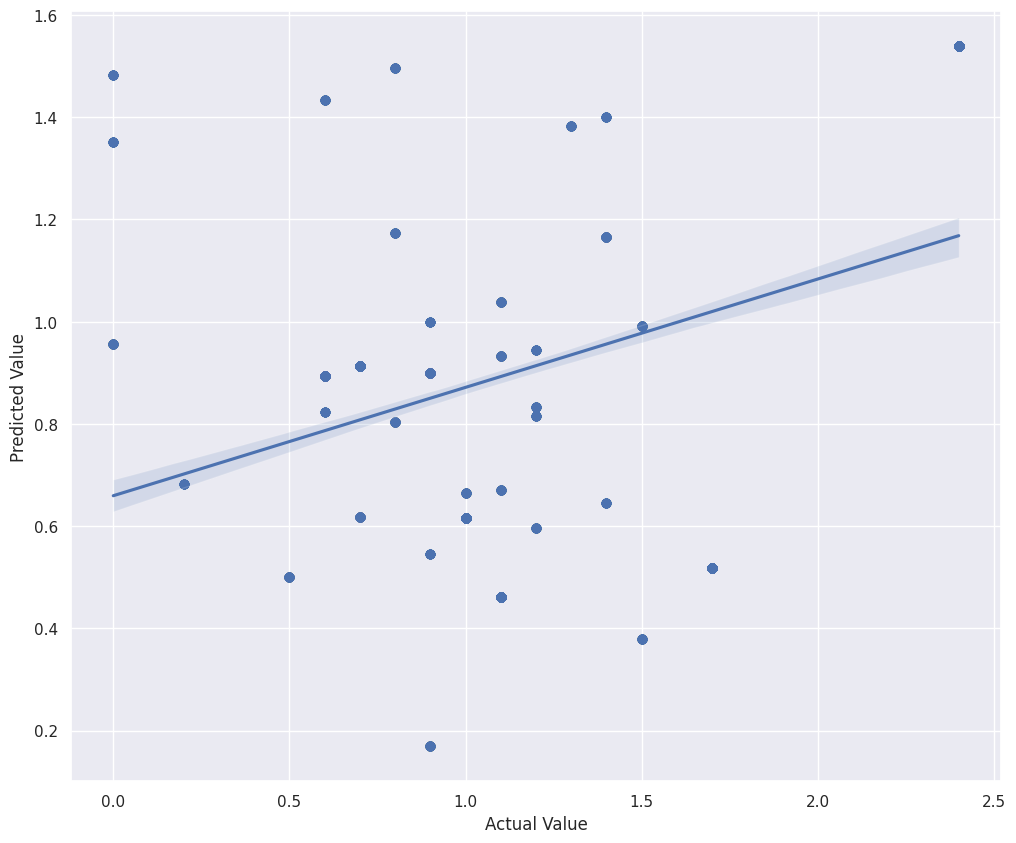

In [46]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);

**SHAP**

In [47]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


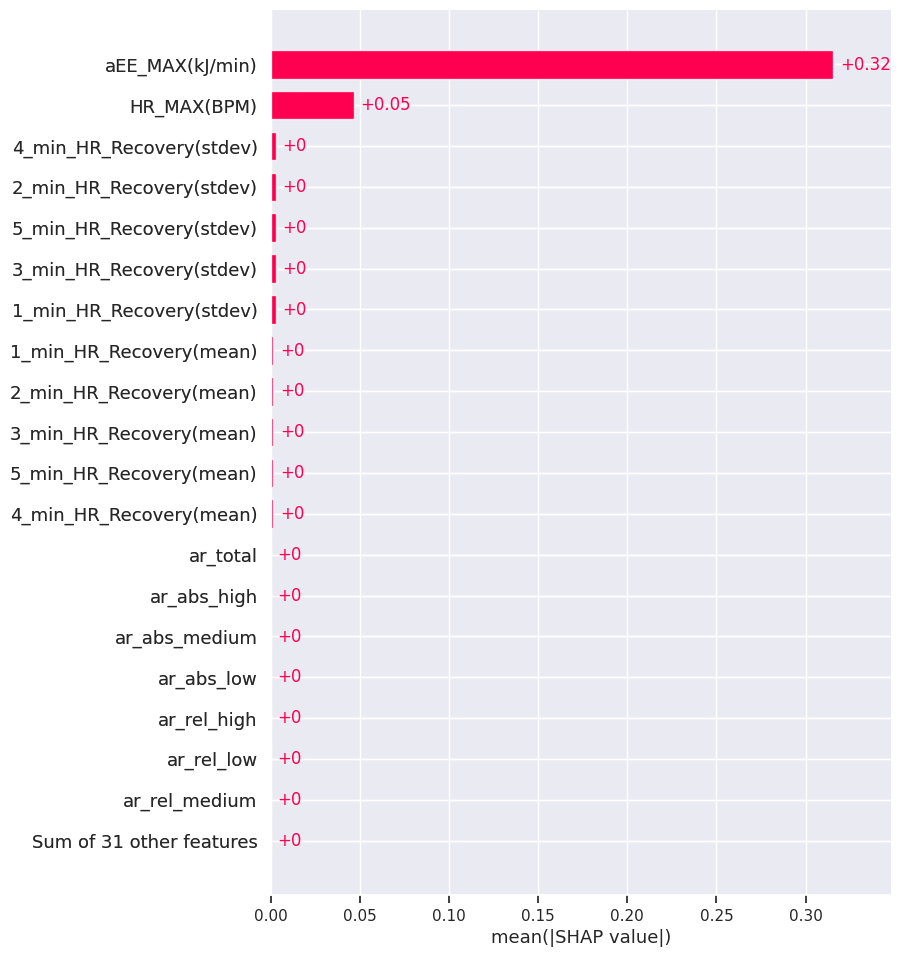

In [48]:
import pandas as pd
import shap
import sklearn
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer (X_train)
shap.plots.bar(shap_values,max_display=20)

#-------------------

#Decision Tree Regressor



In [49]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor


for i in range(2,8):
  regr = DecisionTreeRegressor(max_depth=i)
  regr.fit(X_new, y_new)
  y_pred = regr.predict(X_new)
  from sklearn.metrics import r2_score,mean_squared_error
  print("Training r2: ",r2_score(y_new,y_pred),", When Max Depth:",i)
  if r2_score(y_new,y_pred) ==1:
    mx=i-1
    break


Training r2:  0.6549413449029793 , When Max Depth: 2
Training r2:  0.7575196366221109 , When Max Depth: 3
Training r2:  0.8426838261737485 , When Max Depth: 4
Training r2:  0.9416934030133012 , When Max Depth: 5
Training r2:  0.990836659416235 , When Max Depth: 6
Training r2:  0.9966777761114335 , When Max Depth: 7


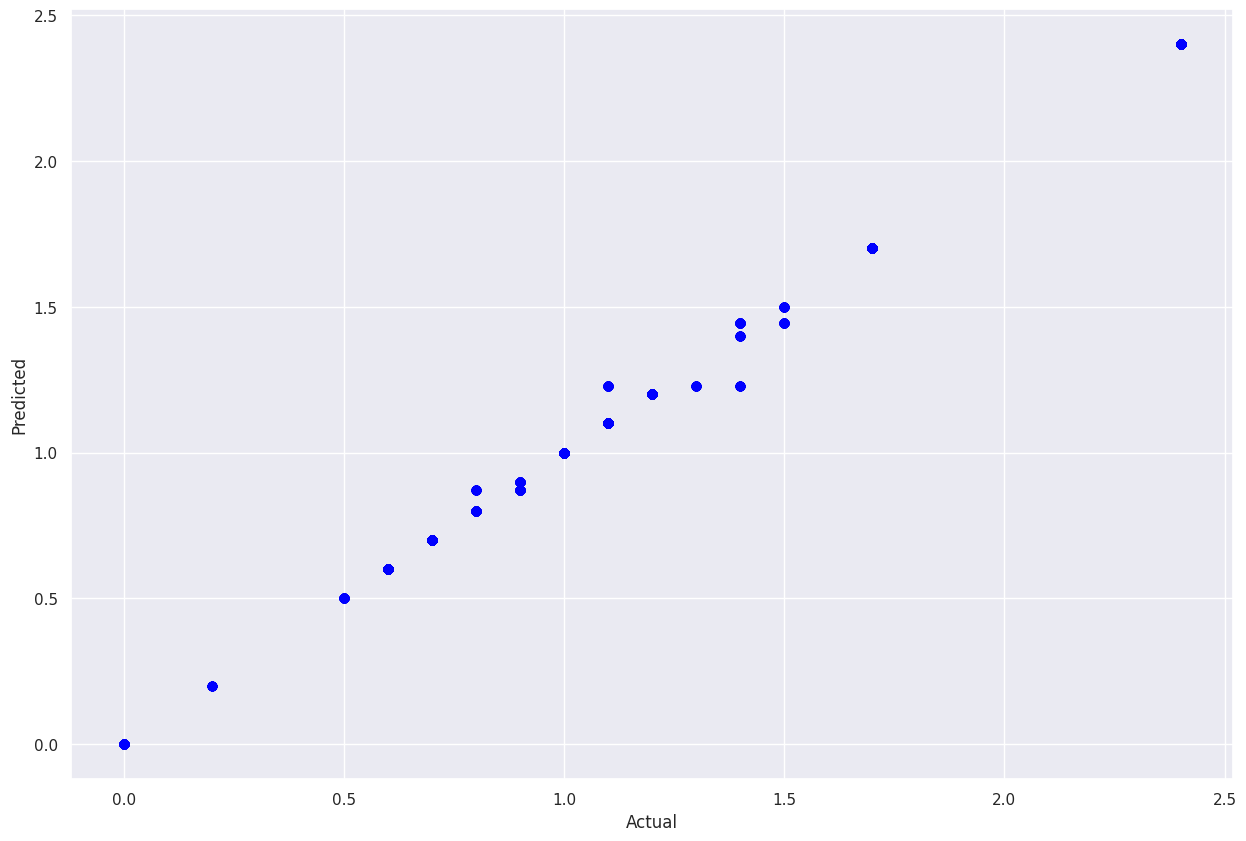

Permutation explainer: 2630it [01:23, 27.60it/s]


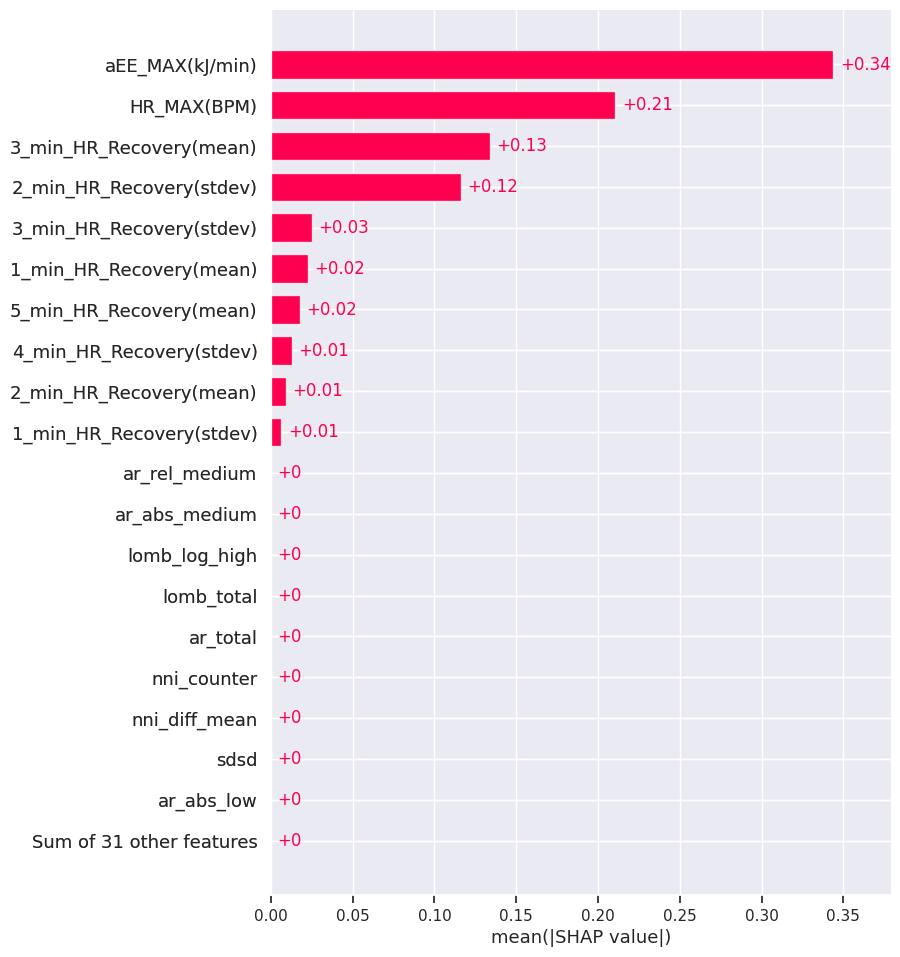

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_new, y_pred, color = "blue")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

regr = DecisionTreeRegressor(max_depth = 7)
regr.fit(X_new, y_new)

explain_shap(regr,X_new,20)

#Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


count=[]
mx_depth=[]

for i in range(2,10):
  rfr = RandomForestRegressor(max_depth=i)

  rfr.fit(X_new, y_new)
  y_pred = rfr.predict(X_new)
  r2=r2_score(y_new,y_pred)
  print("Training r2: ",r2,", When Max Depth:",i)
  count.append(r2)
  mx_depth.append(i)

print("Max R2: ",max(count)," Max Depth: ",mx_depth[count.index(max(count))])

Training r2:  0.6600731868638434 , When Max Depth: 2
Training r2:  0.7713337102543216 , When Max Depth: 3
Training r2:  0.880248021957245 , When Max Depth: 4
Training r2:  0.9567811524391006 , When Max Depth: 5
Training r2:  0.9923115300052677 , When Max Depth: 6
Training r2:  0.9974236126199659 , When Max Depth: 7
Training r2:  0.9997463726910836 , When Max Depth: 8
Training r2:  0.9999986888194642 , When Max Depth: 9
Max R2:  0.9999986888194642  Max Depth:  9


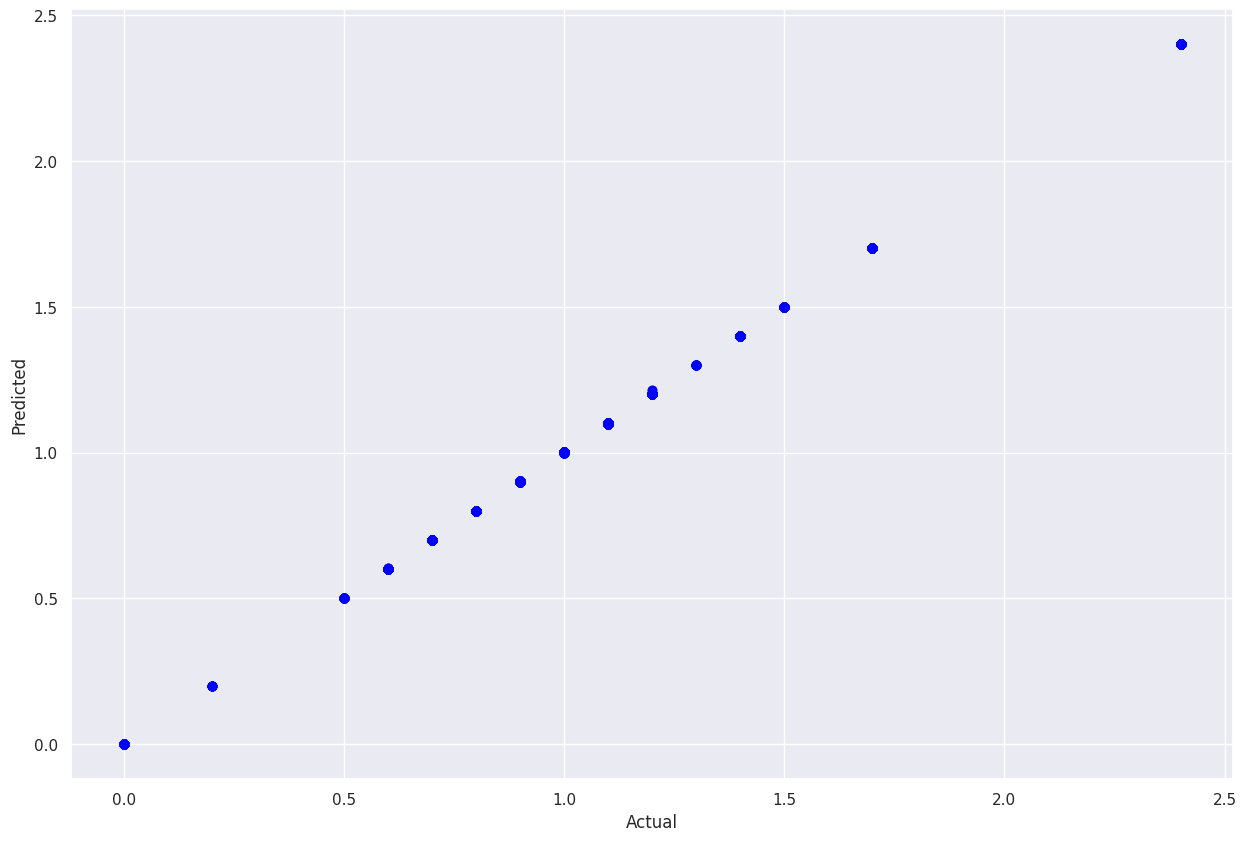

Permutation explainer: 2630it [12:26,  3.47it/s]


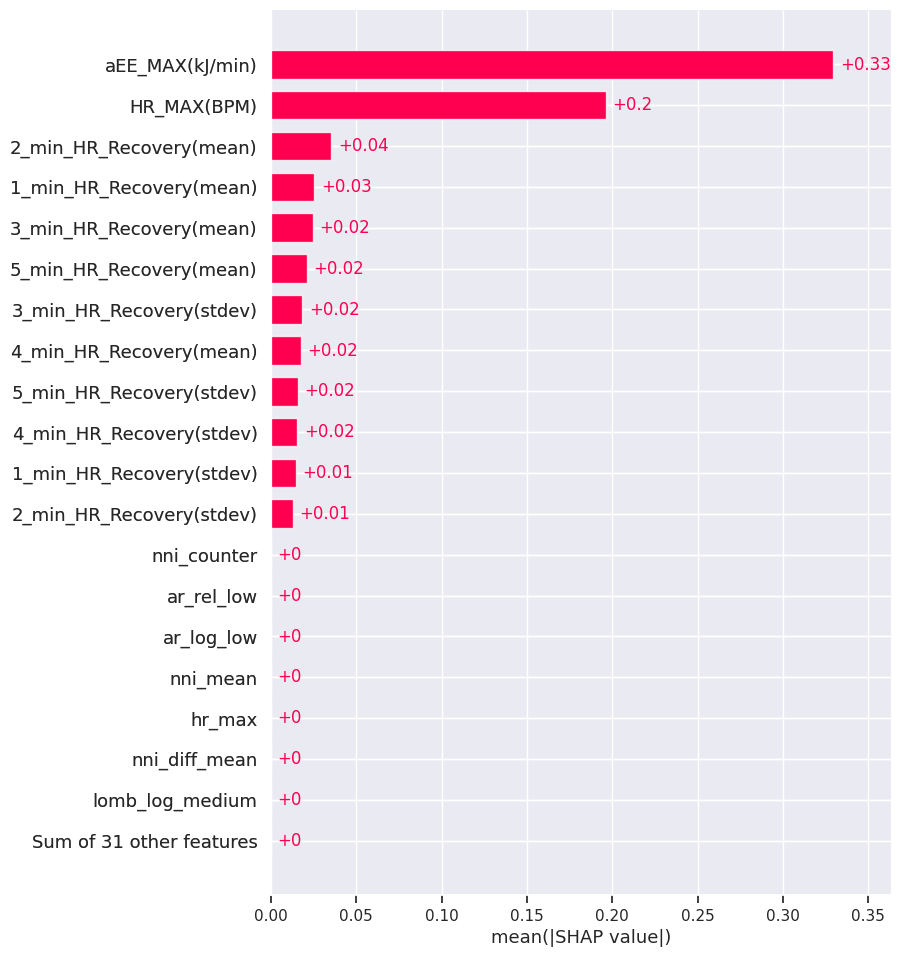

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_new, y_pred, color = "blue")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
regr = RandomForestRegressor(max_depth=mx_depth[count.index(max(count))])
regr.fit(X_new, y_new)

explain_shap(regr,X_new,20)

#Support Vector Regression (SVR)

In [53]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_new, y_new)

y_pred_train = regr.predict(X_new)
print("R2 score: ", r2_score(y_new,y_pred_train))

R2 score:  0.745719333806439


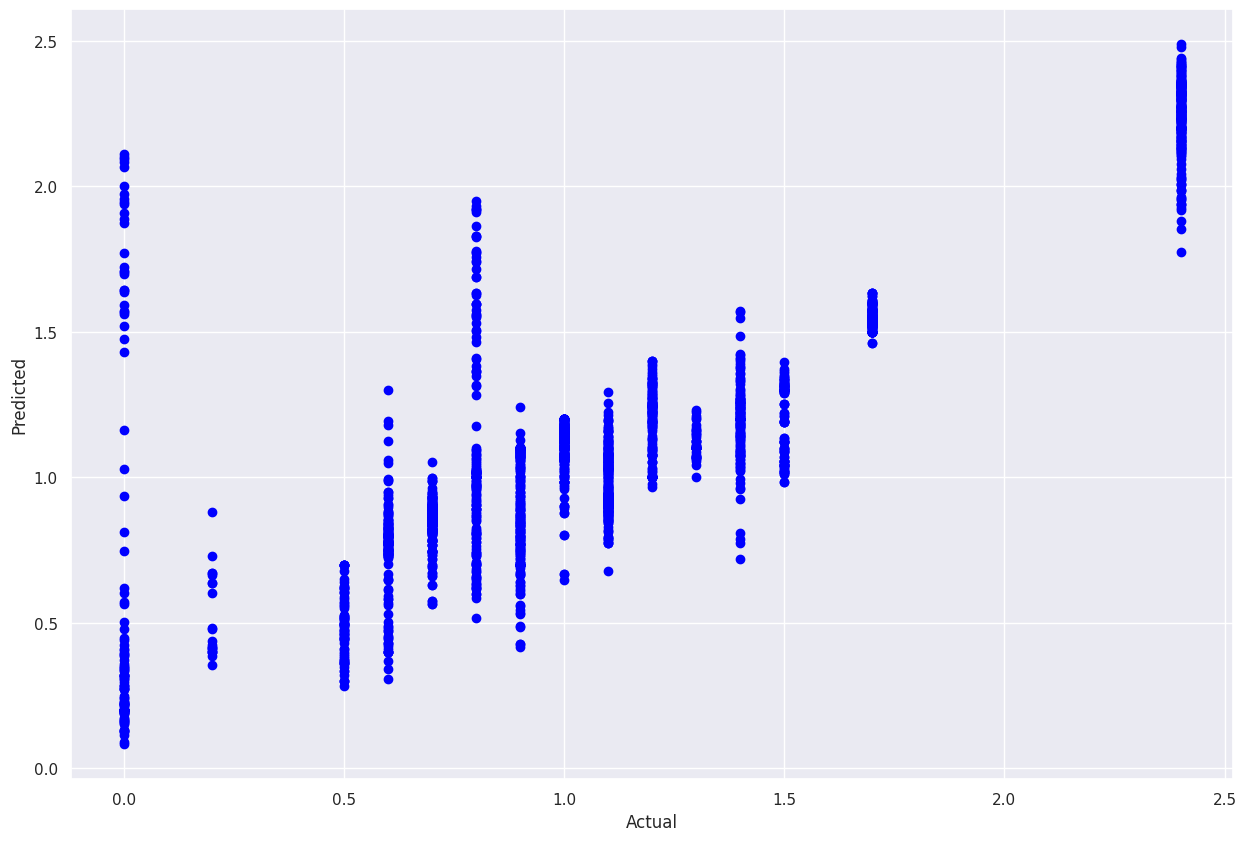

Permutation explainer: 2630it [3:47:34,  5.20s/it]


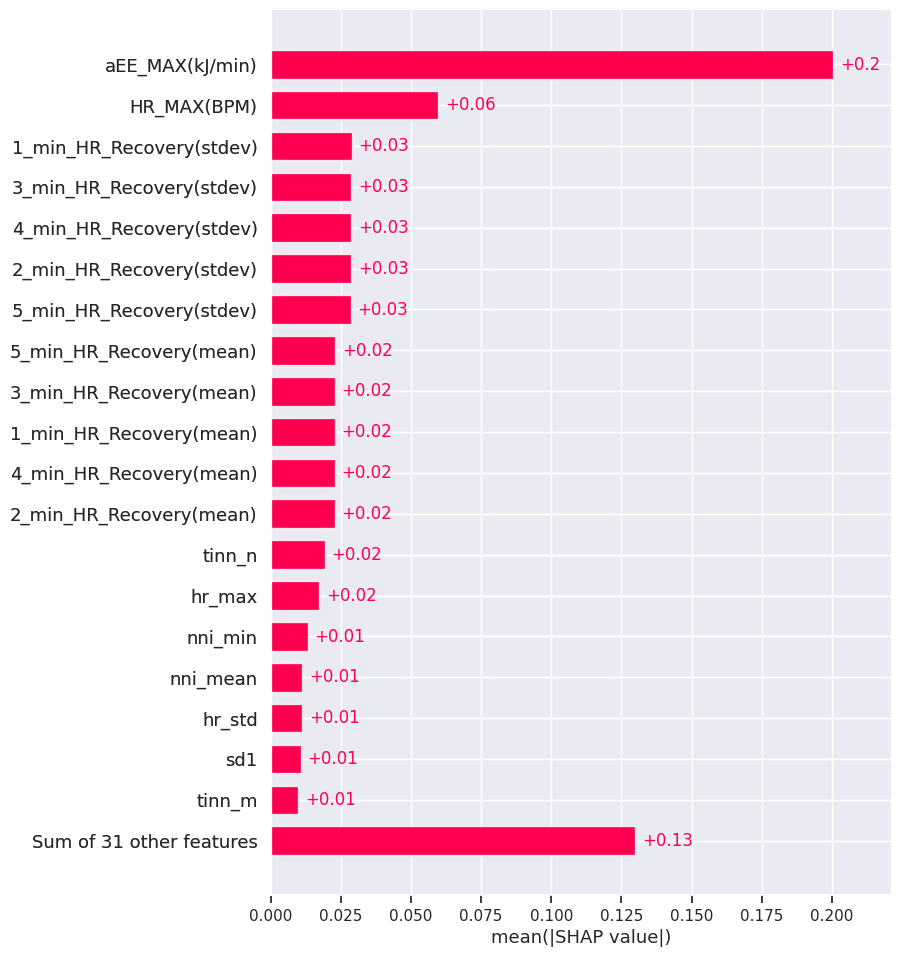

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_new, y_pred_train, color = "blue")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
explain_shap(regr,X_new,20)

#Ridge Regressor

In [ ]:
from sklearn.linear_model import Ridge
regr = Ridge(alpha=1.0)
regr.fit(X_new, y_new)

y_pred_train = regr.predict(X_new)
print("R2 score: ", r2_score(y_new,y_pred_train))

R2 score:  0.30756298427090745


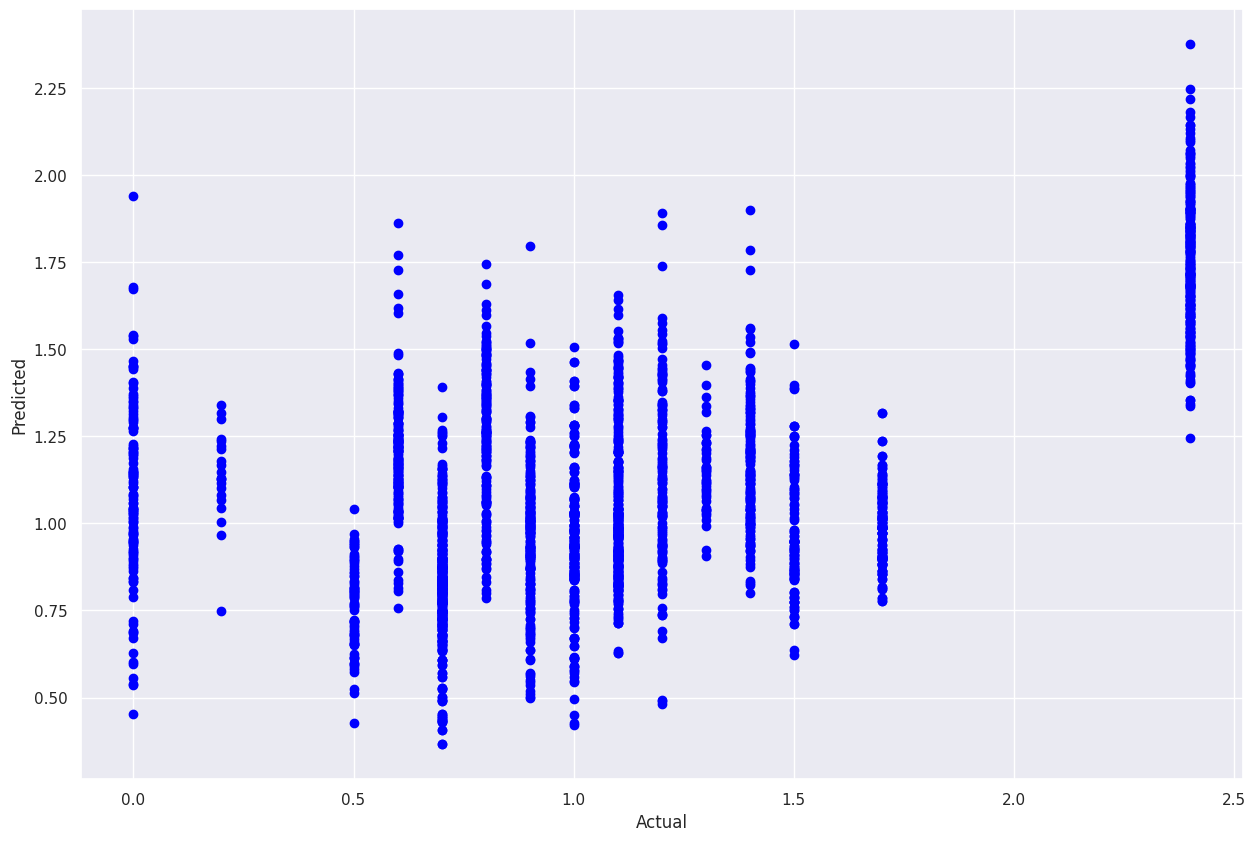

Permutation explainer: 2630it [01:52, 21.09it/s]                          


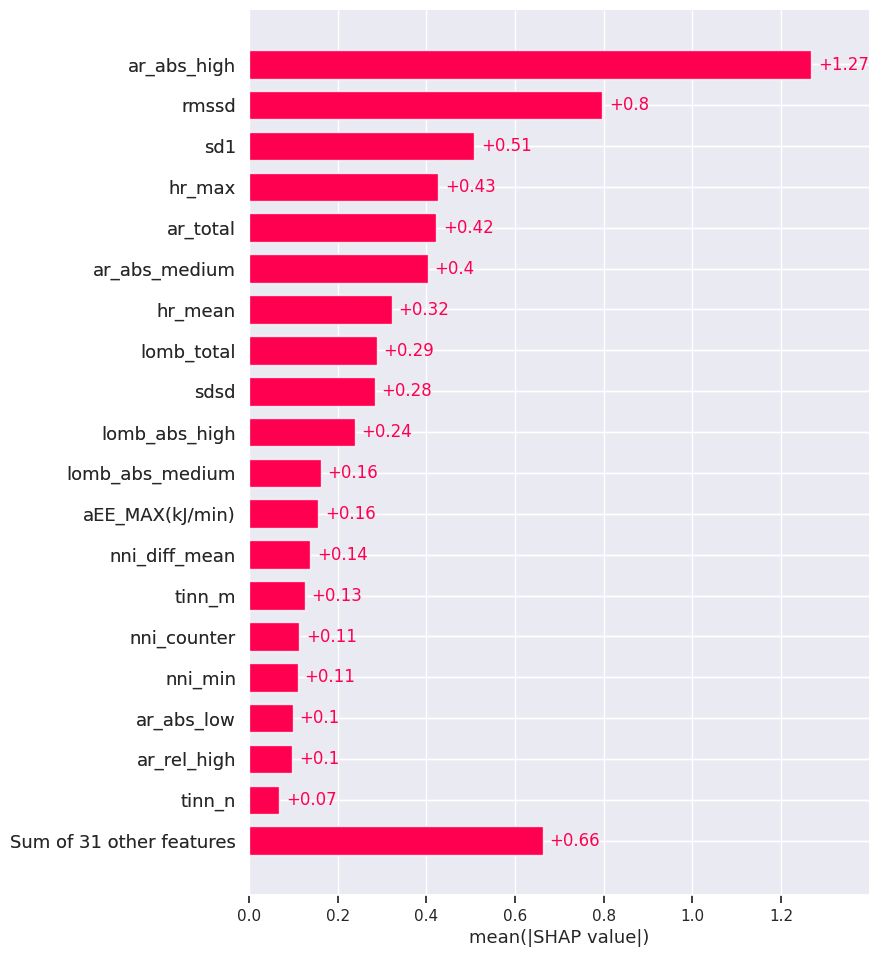

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_new, y_pred_train, color = "blue")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
explain_shap(regr,X_new,20)

#Lasso Regressor

In [ ]:
from sklearn import linear_model
regr = linear_model.Lasso(alpha=0.1)
regr.fit(X_new, y_new)

y_pred_train = regr.predict(X_new)
print("R2 score of Training: ", r2_score(y_new,y_pred_train))

R2 score of Training:  0.28461379246418983


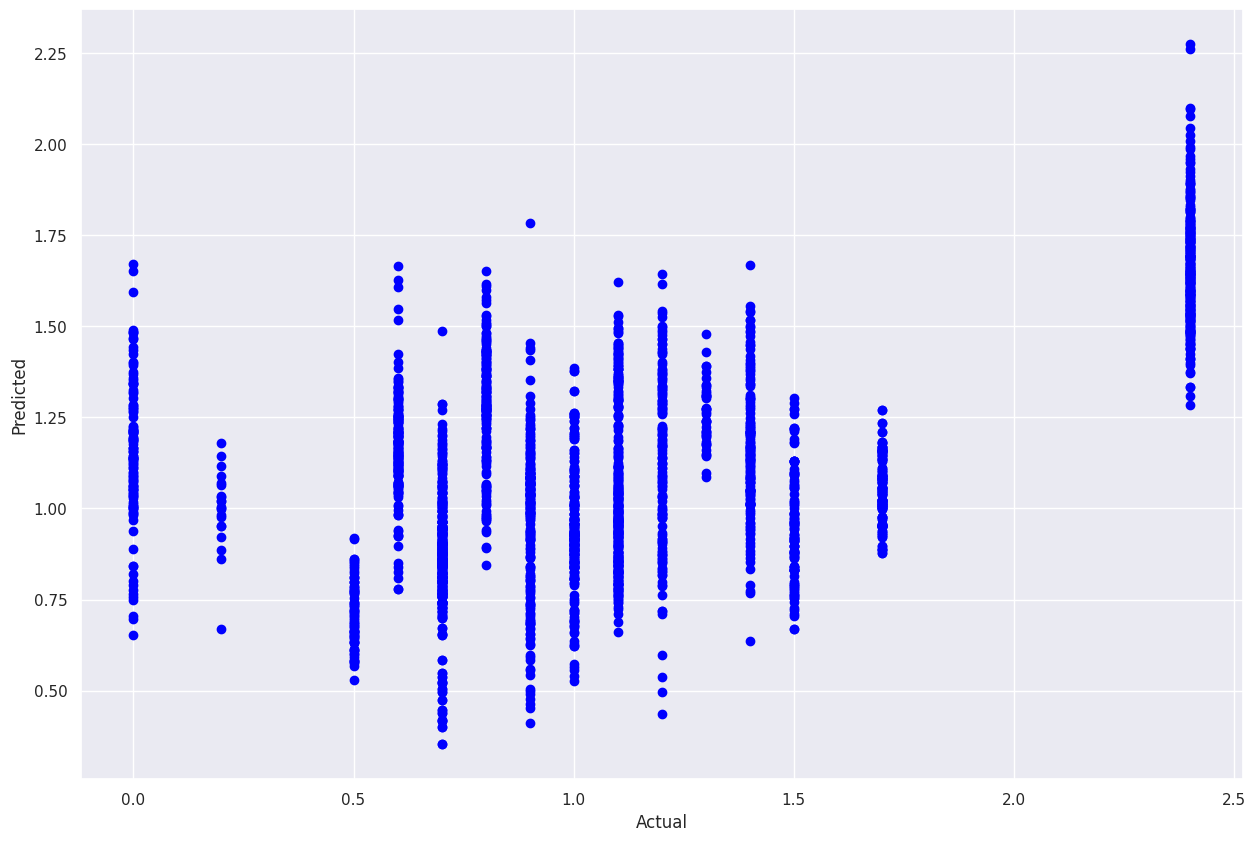

Permutation explainer: 2630it [01:54, 20.96it/s]                          


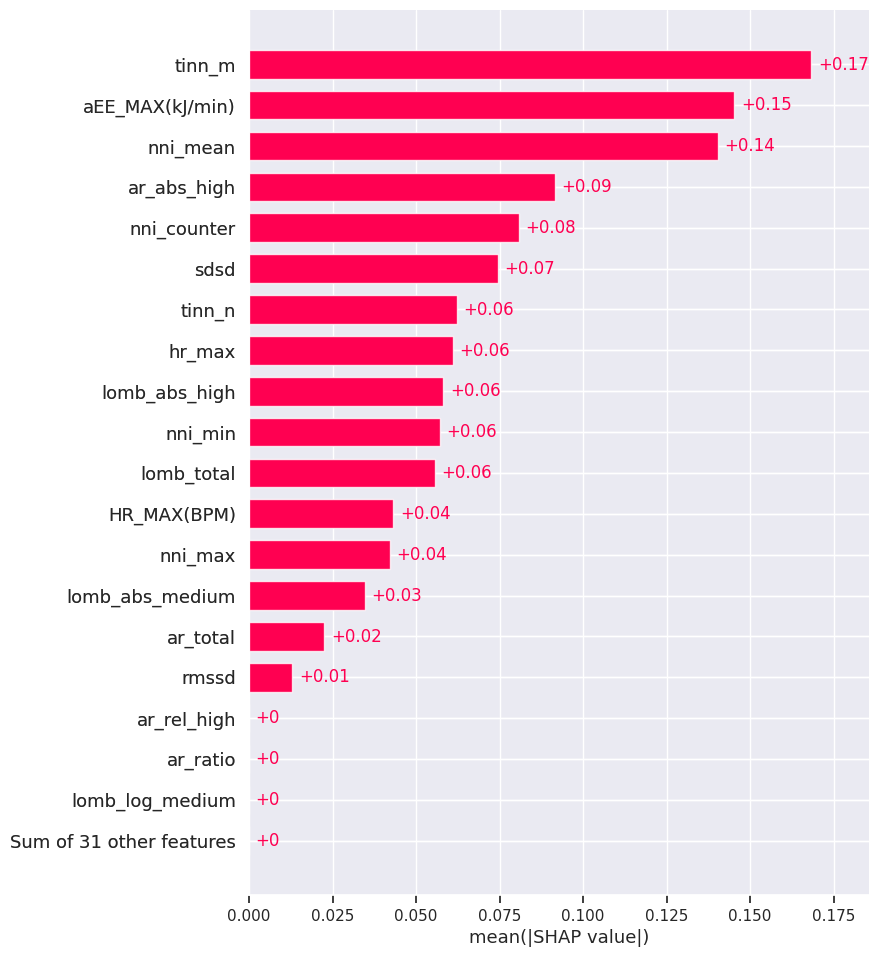

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_new, y_pred_train, color = "blue")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
explain_shap(regr,X_new,20)